In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Levantamos el *dataset*

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


Vemos el tipo de cada columna

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

Veamos si los ID son únicos, así los podemos usar como clave

In [5]:
df['ID'].value_counts().head()

6141     1
27384    1
21263    1
19212    1
25353    1
Name: ID, dtype: int64

Son únicos porque el mayor es 1. Así que van como clave:

In [6]:
df = df.set_index('ID')
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


---
## Limpieza del *dataset*

Por enunciado:

* Hay columnas levantadas como `object` que deberían ser `date`.
* Otras como `int64` que deberían ser `bool`.
* Y otras como `object` que deberían ser `categorical`.

In [7]:
# Las date van directo como lista como parámetro para parse_dates
date_columns = [
                'Account_Created_Date',
                'Opportunity_Created_Date',
                'Quote_Expiry_Date',
                'Last_Modified_Date',
                'Planned_Delivery_Start_Date',
                'Planned_Delivery_End_Date',
]

In [8]:
# El resto va como dict. Las vamos sumando de a uno al dict 'column_types'
bool_columns = [
                'Pricing, Delivery_Terms_Quote_Appr',
                'Pricing, Delivery_Terms_Approved',
                'Bureaucratic_Code_0_Approval',
                'Bureaucratic_Code_0_Approved',
                'Submitted_for_Approval'
]
column_types = {col:'bool' for col in bool_columns}

categorical_columns = [
    'Region',
    'Territory',
    'Bureaucratic_Code',
    'Source ',
    'Billing_Country',
    'Account_Name',
    'Opportunity_Name',
    'Account_Owner',
    'Opportunity_Owner',
    'Account_Type',
    'Opportunity_Type',
    'Quote_Type',
    'Delivery_Terms',
    'Brand',
    'Product_Type',
    'Size',
    'Product_Category_B',
    'Currency',
    'Last_Modified_By',
    'Product_Family',
    'Product_Name',
    'ASP_Currency',
    'ASP_(converted)_Currency',
    'Delivery_Quarter',
    'Total_Amount_Currency',
    'Total_Taxable_Amount_Currency',
    'Stage',
    'Prod_Category_A'
]
column_types.update({col:'category' for col in categorical_columns})

In [9]:
# Excluidos porque son todos None
empty = ['Actual_Delivery_Date', 'Last_Activity']

## Carga y limpieza definitiva del csv
### Columnas a las que les cambiamos el tipo:
* Todas las fechas a `datetime`
* Varios `object` a `categorical`

### Columnas que no levantamos directo:
* `'Actual_Delivery_Date'` como datetime64 (todos nan) -->  `use_cols`
* `'Last_Activity'` como datetime64 (todos nan) --> `use_cols`
* `'Sales_Contract_No'` como int64 (tiene 'None's) --> `fillna(0).astype()`
* `'Price'` como float64 (tiene 'None's) --> `na_values`

In [11]:
df = pd.read_csv('train.csv', parse_dates=date_columns, dtype=column_types,
                 index_col='ID', na_values=['Other', 'NaT', 'None'],
                 usecols=lambda x: x not in empty)

df['Sales_Contract_No'] = df['Sales_Contract_No'].fillna(0).astype(np.int64)
df['Month'] = pd.to_datetime(df['Month'], format='%Y - %m')
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,NaN,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,NaN,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


##### Vemos cómo quedan las columnas:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16947 entries, 27761 to 28318
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Region                              16947 non-null  category      
 1   Territory                           11948 non-null  category      
 2   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 3   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 4   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 5   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 6   Submitted_for_Approval              16947 non-null  bool          
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              7450 non-null   category      
 10  Billing_Country   

---

## Análisis Exploratorio

In [13]:
tomi_subset = df.loc[:,["Quote_Expiry_Date","Last_Modified_Date","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Year","Stage"]]
tomi_subset

,Quote_Expiry_Date,Last_Modified_Date,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Stage
ID,,,,,,,,,,,,,
27761,2016-01-30,2016-06-13,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016-05-01,2016,Closed Lost
27760,2016-01-20,2016-01-15,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016-01-01,2016,Closed Won
27446,2016-09-30,2016-09-29,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016-01-01,2016,Closed Won
16808,NaT,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018-02-01,2018,Closed Lost
16805,2017-06-02,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018-02-01,2018,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016-03-01,2016,Closed Won
8786,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016-04-01,2016,Closed Won
8792,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,2016-03-01,2016,Closed Won


### Distribución de fechas de entrega


El rango en días en el que se cierra la oportunidad lo calculamos con la fecha de inicio y la fecha de fin planeadas 

In [14]:
tomi_subset["Delivery_Range"] = tomi_subset["Planned_Delivery_End_Date"] - tomi_subset["Planned_Delivery_Start_Date"]
tomi_subset["Delivery_Range"]

ID
27761   60 days
27760    2 days
27446    0 days
16808   58 days
16805   27 days
          ...  
8781     4 days
8786     4 days
8792     3 days
28561    4 days
28318   61 days
Name: Delivery_Range, Length: 16947, dtype: timedelta64[ns]

A falta de los datos de la columna "Actual_Delivery_Date", estimamos una fecha de entrega como la fecha promedio del rango previamente definido.

In [15]:
tomi_subset["Estimated_Delivery_Date"] = tomi_subset["Planned_Delivery_Start_Date"] + (tomi_subset["Delivery_Range"]/2)
tomi_subset

,Quote_Expiry_Date,Last_Modified_Date,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Stage,Delivery_Range,Estimated_Delivery_Date
ID,,,,,,,,,,,,,,,
27761,2016-01-30,2016-06-13,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016-05-01,2016,Closed Lost,60 days,2016-05-31 00:00:00
27760,2016-01-20,2016-01-15,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016-01-01,2016,Closed Won,2 days,2016-01-19 00:00:00
27446,2016-09-30,2016-09-29,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016-01-01,2016,Closed Won,0 days,2016-01-25 00:00:00
16808,NaT,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018-02-01,2018,Closed Lost,58 days,2018-03-02 00:00:00
16805,2017-06-02,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018-02-01,2018,Closed Lost,27 days,2018-02-14 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016-03-01,2016,Closed Won,4 days,2016-03-23 00:00:00
8786,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016-04-01,2016,Closed Won,4 days,2016-04-06 00:00:00
8792,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,2016-03-01,2016,Closed Won,3 days,2016-03-29 12:00:00


In [16]:
tomi_subset = tomi_subset[tomi_subset["Estimated_Delivery_Date"].dt.year <= 2020]
tomi_subset

,Quote_Expiry_Date,Last_Modified_Date,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Stage,Delivery_Range,Estimated_Delivery_Date
ID,,,,,,,,,,,,,,,
27761,2016-01-30,2016-06-13,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016-05-01,2016,Closed Lost,60 days,2016-05-31 00:00:00
27760,2016-01-20,2016-01-15,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016-01-01,2016,Closed Won,2 days,2016-01-19 00:00:00
27446,2016-09-30,2016-09-29,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016-01-01,2016,Closed Won,0 days,2016-01-25 00:00:00
16808,NaT,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018-02-01,2018,Closed Lost,58 days,2018-03-02 00:00:00
16805,2017-06-02,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018-02-01,2018,Closed Lost,27 days,2018-02-14 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016-03-01,2016,Closed Won,4 days,2016-03-23 00:00:00
8786,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016-04-01,2016,Closed Won,4 days,2016-04-06 00:00:00
8792,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,2016-03-01,2016,Closed Won,3 days,2016-03-29 12:00:00


,Delivery_Range,Stage
ID,,
27761,60 days,Closed Lost
27760,2 days,Closed Won
27446,0 days,Closed Won
16808,58 days,Closed Lost
16805,27 days,Closed Lost
...,...,...
8781,4 days,Closed Won
8786,4 days,Closed Won
8792,3 days,Closed Won


TypeError: cannot astype a timedelta from [timedelta64[ns]] to [float64]

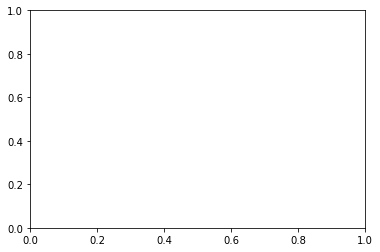

In [17]:
# Distribución de los rangos en días por Stage

to_plot = tomi_subset.loc[tomi_subset["Stage"].isin(["Closed Won","Closed Lost"]),["Delivery_Range","Stage"]]
display(to_plot)

won = tomi_subset.loc[tomi_subset["Stage"]=="Closed Won","Delivery_Range"].to_frame()
won
lost = tomi_subset.loc[tomi_subset["Stage"]=="Closed Lost","Delivery_Range"]

#sns.kdeplot(pd.to_numeric(won.dt.days).dropna(), hue = 1)    
#sns.kdeplot(pd.to_numeric(lost.dt.days).dropna(), hue = 2)
sns.kdeplot(to_plot, hue = "Stage")
plt.show()

    

Group:  Closed Lost  - Sample size:  7320
Distribución de Closed Lost en el mes


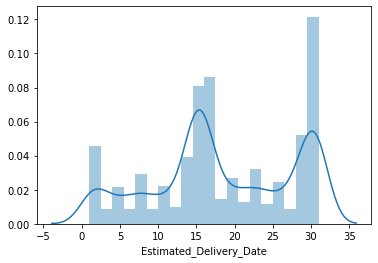

Distribución de Closed Lost en el año por meses


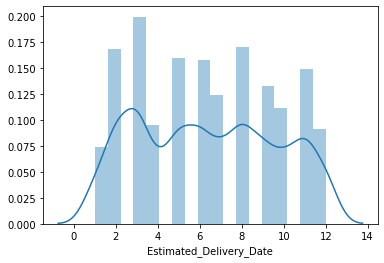

Distribución de Closed Lost en el año por trimestres


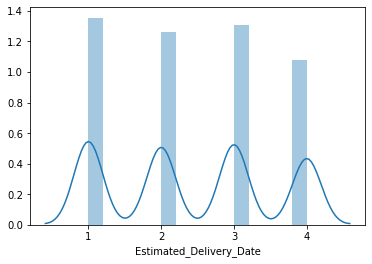

Distribución de Closed Lost histórica


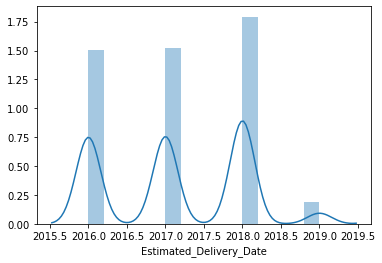

Group:  Closed Won  - Sample size:  9487
Distribución de Closed Won en el mes


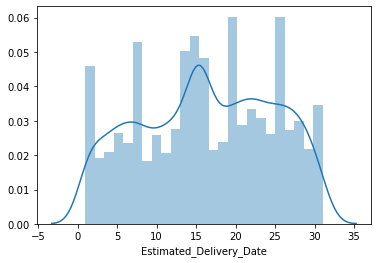

Distribución de Closed Won en el año por meses


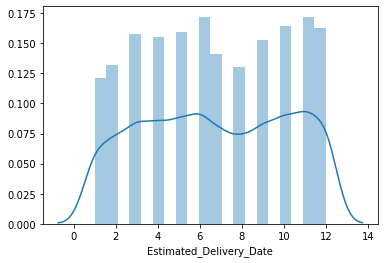

Distribución de Closed Won en el año por trimestres


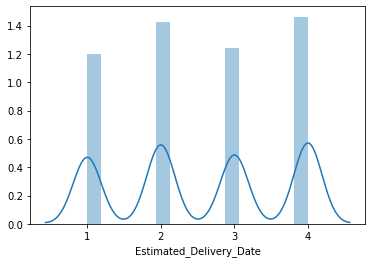

Distribución de Closed Won histórica


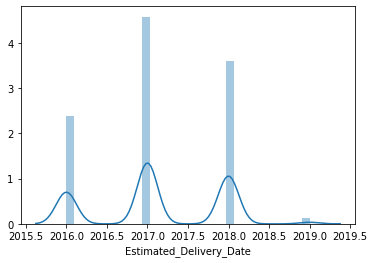

In [18]:
# Distribución de los días del mes en que se estima "Delivery_Date"

selected = ["Closed Lost","Closed Won"]

for name,group in tomi_subset.groupby("Stage")["Estimated_Delivery_Date"]:
    if name not in selected: continue
    
    print("Group: ",name, " - Sample size: ",group.size)
    
    print("Distribución de",name,"en el mes")
    sns.distplot(pd.to_numeric(group.dt.day).dropna(), norm_hist= True)
    plt.show()
    
    print("Distribución de",name,"en el año por meses")
    sns.distplot(pd.to_numeric(group.dt.month).dropna(), norm_hist= True)
    plt.show()
    
    print("Distribución de",name,"en el año por trimestres")
    sns.distplot(pd.to_numeric(group.dt.quarter).dropna(), norm_hist= True)
    plt.show()
    
    print("Distribución de",name,"histórica")
    sns.distplot(pd.to_numeric(group.dt.year).dropna(), norm_hist= True)
    plt.show()
    

Distribución de Estimated_Delivery_Date en el mes


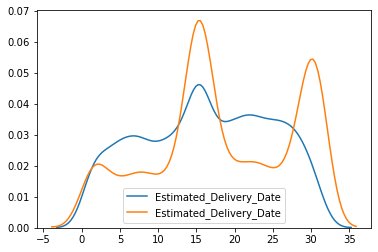

Distribución de Estimated_Delivery_Date en el año por meses


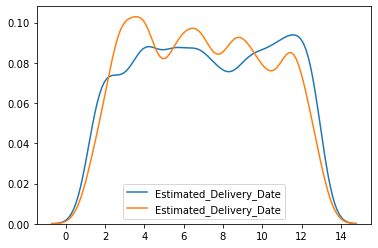

Distribución de Estimated_Delivery_Date en el año por trimestres


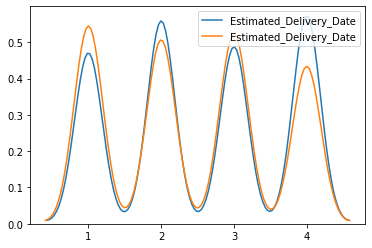

Distribución de Estimated_Delivery_Date histórica


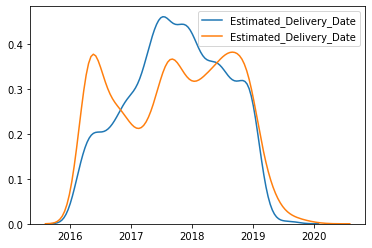

In [19]:
# Distribución de los días del mes en que se estima "Delivery_Date"

won = tomi_subset.loc[tomi_subset["Stage"]=="Closed Won","Estimated_Delivery_Date"]
lost = tomi_subset.loc[tomi_subset["Stage"]=="Closed Lost","Estimated_Delivery_Date"]

print("Distribución de Estimated_Delivery_Date en el mes")
sns.kdeplot(pd.to_numeric(won.dt.day).dropna())
sns.kdeplot(pd.to_numeric(lost.dt.day).dropna())
plt.show()

print("Distribución de Estimated_Delivery_Date en el año por meses")
data = ( pd.to_numeric(won.dt.month) + pd.to_numeric(won.dt.day)/30).dropna()
sns.kdeplot(data)
data = (pd.to_numeric(lost.dt.month) + pd.to_numeric(lost.dt.day)/30).dropna()
sns.kdeplot(data)
plt.show()

print("Distribución de Estimated_Delivery_Date en el año por trimestres")
sns.kdeplot(pd.to_numeric(won.dt.quarter).dropna())
sns.kdeplot(pd.to_numeric(lost.dt.quarter).dropna())

plt.show()

print("Distribución de Estimated_Delivery_Date histórica")
data = (pd.to_numeric(won.dt.year) + pd.to_numeric(won.dt.month)/12 + pd.to_numeric(won.dt.day)/365).dropna()
sns.kdeplot(data)
data = (pd.to_numeric(lost.dt.year) + pd.to_numeric(lost.dt.month)/12 + pd.to_numeric(lost.dt.day)/365).dropna()
sns.kdeplot(data)
plt.show()

# Conociendo un poco más el set

In [19]:
grouped = df.groupby("Pricing, Delivery_Terms_Approved").agg({"Stage":"value_counts"}).unstack().reset_index()

new_columns = ["Pricing","Closed Lost", "Closed Won", "Negotiation", "Proposal", "Qualification"]

grouped.columns = new_columns
grouped

TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

In [ ]:
for column in grouped:
    if column is "Pricing": continue
    grouped[column].plot(kind="pie",labels=["Pricing False","Pricing True"],legend=True,colors=["pink","lightgreen"])
    plt.show()

### ¿Todas las mismas opportunity ID tienen un mismo oportunity Name? : Podemos decir que si

In [20]:
df.groupby("Opportunity_ID").agg({"Stage":"count"})["Stage"].nlargest(5)

Opportunity_ID
2008     36
12460    36
5123     26
6606     26
2911     24
Name: Stage, dtype: int64

In [21]:
df.loc[df["Opportunity_ID"] == 2008,"Opportunity_Name"].value_counts()

Opportunity_Name_9795    36
Opportunity_Name_9923     0
Opportunity_Name_2260     0
Opportunity_Name_2268     0
Opportunity_Name_2265     0
                         ..
Opportunity_Name_6362     0
Opportunity_Name_6361     0
Opportunity_Name_6360     0
Opportunity_Name_636      0
Opportunity_Name_0        0
Name: Opportunity_Name, Length: 9841, dtype: int64

### ¿Como evolucionan las Oportunidades en el tiempo? ¿Qué columnas cambian en cada actualizacion?

In [22]:
# Cambio las columnas boleanas a numéricas
df= df.astype({x:"int" for x in bool_columns})
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,NaN,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,NaN,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [23]:
# Definimos una funcion que lo que hace es tomar una serie y 
# devolver la cantidad de valores no repetidos que toma.

def count_values(serie):
    return serie.drop_duplicates().size

In [24]:
# Definimos una serie con transform donde por cada oportunidad cuenta los registros que hay

regsByOp = df.groupby("Opportunity_ID")["Stage"].transform("count")
regsByOp

ID
27761    1
27760    1
27446    1
16808    1
16805    1
        ..
8781     3
8786     3
8792     3
28561    1
28318    1
Name: Stage, Length: 16947, dtype: int64

In [25]:
ColumnActivityByOp = df[regsByOp > 1].groupby("Opportunity_ID").agg(count_values)
ColumnActivityByOp

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5.0,1,1.0,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5.0,1,1.0,1,1
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5.0,1,1.0,1,1
13,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,6.0,1,1.0,1,1
14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,6.0,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12785,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,3.0,1,1.0,1,1
12796,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2.0,1,1.0,1,1
12797,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,3.0,1,1.0,1,1


In [26]:
# Las columnas cuyo valor ha cambiado un valor maximo de veces, en una misma Op_ID

columnValuesByOp = ColumnActivityByOp.apply("max")
columnValuesByOp = columnValuesByOp[columnValuesByOp > 1]
columnValuesByOp = columnValuesByOp.sort_values(ascending=False)
columnValuesByOp

Product_Name                   36.0
Product_Family                 36.0
Total_Amount                   34.0
Planned_Delivery_End_Date      14.0
Planned_Delivery_Start_Date    13.0
Month                          12.0
ASP_(converted)                 8.0
ASP                             8.0
TRF                             7.0
Delivery_Quarter                4.0
Delivery_Year                   2.0
dtype: float64

In [27]:
# Las Op_Id que registran un maximo numero de cambios en alguna columna

maxColumnChanges = ColumnActivityByOp.agg("max",axis= 1)
maxColumnChanges

Opportunity_ID
8        5.0
9        5.0
10       5.0
13       6.0
14       6.0
        ... 
12785    3.0
12796    2.0
12797    3.0
12800    2.0
12801    3.0
Length: 2920, dtype: float64

In [28]:
OpID_cambiantes = maxColumnChanges[maxColumnChanges>1]
OpID_cambiantes

Opportunity_ID
8        5.0
9        5.0
10       5.0
13       6.0
14       6.0
        ... 
12785    3.0
12796    2.0
12797    3.0
12800    2.0
12801    3.0
Length: 2869, dtype: float64

In [29]:
# Ejemplo: La Opportunity_ID = 12796 parece en la lista 'maxColumnChanges' entonces 
#          debe aparecer por lo menos 2 veces en el df original y la diferencia debe estar
#          en alguna o varias columnas previamente enlistadas.

df.loc[df["Opportunity_ID"] == 12796] 

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
15848,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,NaN,...,2016-02-01,Q1,2016,0,EUR,56350.0,EUR,112510.0,Closed Won,Prod_Category_A_None
15853,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,NaN,...,2016-02-01,Q1,2016,0,EUR,56160.0,EUR,112510.0,Closed Won,Prod_Category_A_None


#### Visualizacion en ScatterPlot

Se busca un scatterplot en el que cada punto represente un usuario (eje x), una columna (eje y), el numero de valores actualizados (color) y el stage (forma).

In [30]:
to_plot = ColumnActivityByOp.unstack().to_frame().reset_index()
to_plot = pd.merge(to_plot,df.loc[:,["Opportunity_ID","Stage"]],on = "Opportunity_ID", how = "inner")
to_plot = to_plot.rename(columns={"level_0":"column",0:"reps"})
to_plot = to_plot.loc[to_plot["column"].isin(columnValuesByOp.index)]
to_plot

,column,Opportunity_ID,reps,Stage
150,Product_Family,8,5.0,Closed Lost
151,Product_Family,8,5.0,Closed Lost
152,Product_Family,8,5.0,Closed Lost
153,Product_Family,8,5.0,Closed Lost
154,Product_Family,8,5.0,Closed Lost
...,...,...,...,...
481228,TRF,12801,1.0,Closed Won
481229,TRF,12801,1.0,Closed Won
481233,Total_Amount,12801,2.0,Closed Won
481234,Total_Amount,12801,2.0,Closed Won


<AxesSubplot:xlabel='reps', ylabel='column'>

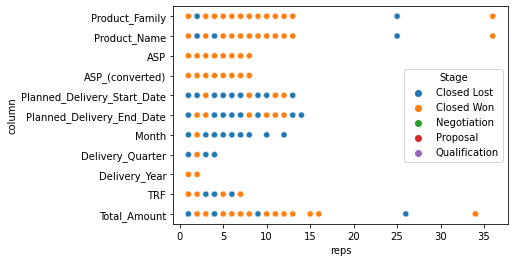

In [31]:
sns.scatterplot(data=to_plot, x="reps",y ="column",hue="Stage")

In [32]:
df.groupby("Opportunity_ID").agg({"Product_Family":count_values}).nlargest(1,"Product_Family")

,Product_Family
Opportunity_ID,
2008,36


In [33]:
selected = ColumnActivityByOp.filter(OpID_cambiantes,axis=0).filter(items= columnValuesByOp.index).reset_index()
selected = pd.merge(selected,df.reset_index().loc[:,["Opportunity_ID","Stage"]],on = "Opportunity_ID", how = "left")
selected

,Opportunity_ID,Product_Name,Product_Family,Total_Amount,Planned_Delivery_End_Date,Planned_Delivery_Start_Date,Month,ASP_(converted),ASP,TRF,Delivery_Quarter,Delivery_Year,Stage
0,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
1,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
2,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
3,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
4,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
388,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
389,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
390,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost


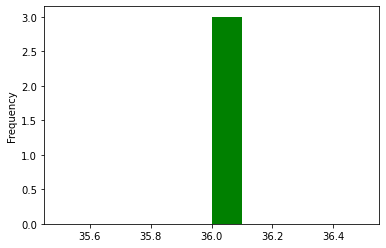

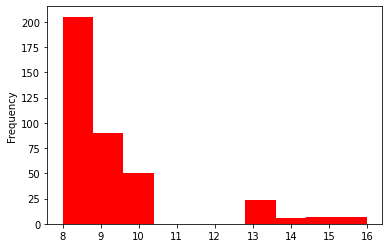

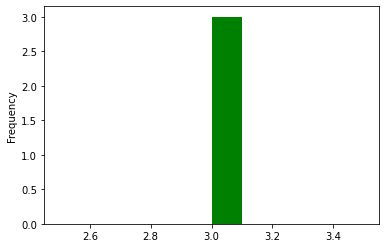

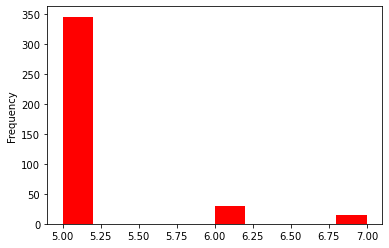

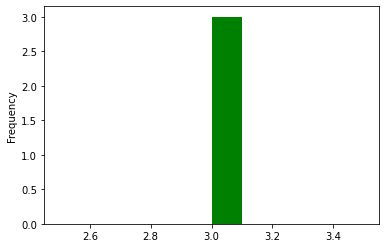

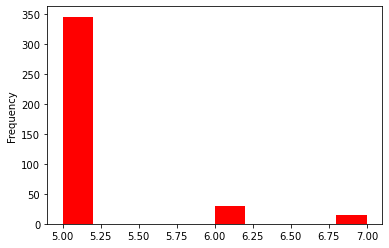

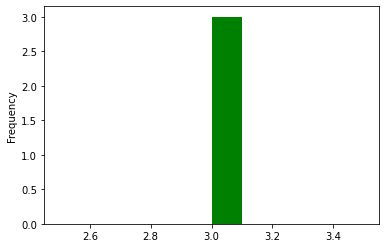

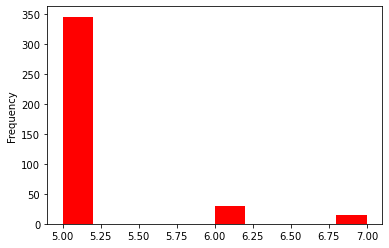

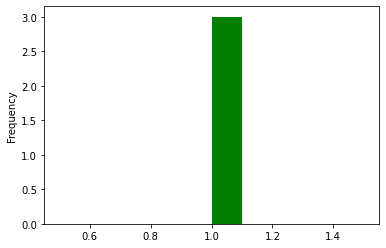

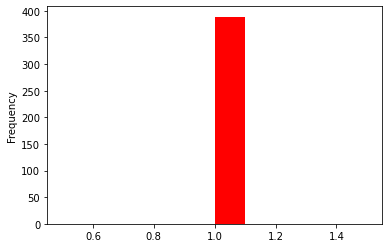

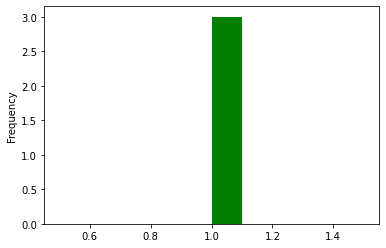

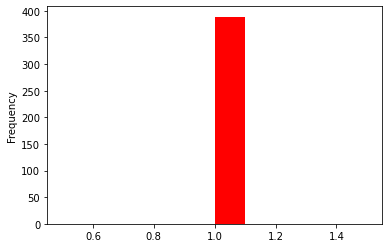

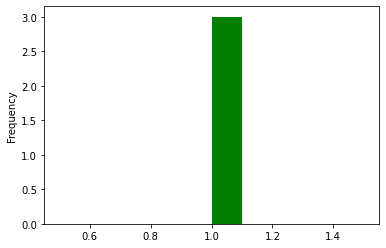

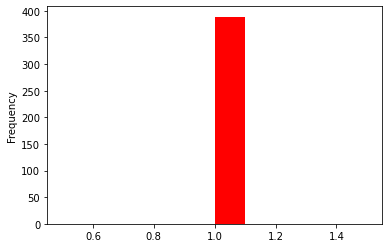

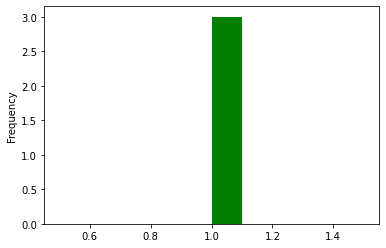

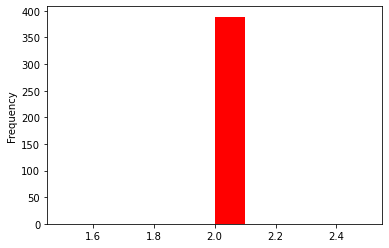

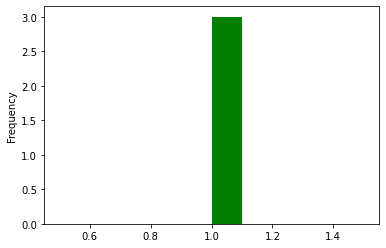

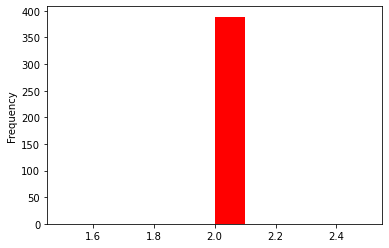

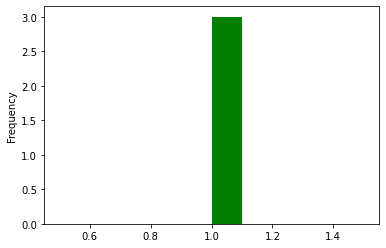

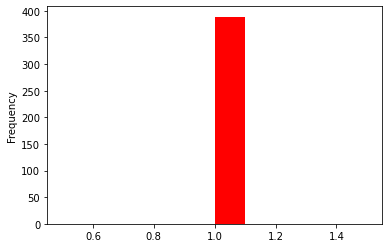

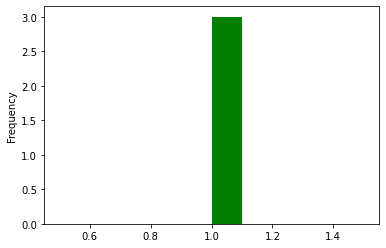

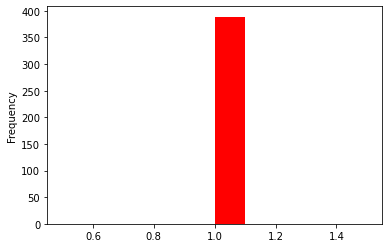

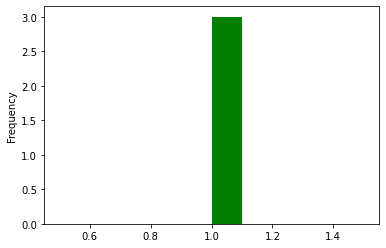

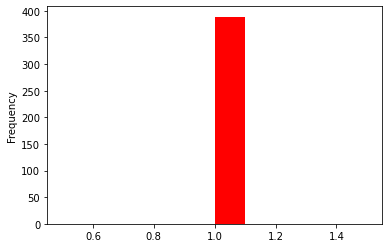

TypeError: no numeric data to plot

In [34]:
for column in selected:
    is_won = selected["Stage"] == "Closed Won"
    reselected = selected.loc[is_won,column]
    reselected.plot.hist(color="green")
    plt.show()
    reselected = selected.loc[ is_won == False,column]
    reselected.plot.hist(color="red")
    plt.show()

### Rainplot de repeticiones de las columnas con altos valores de rep.

In [42]:
to_plot = ColumnActivityByOp


to_plot = pd.merge(to_plot,df.loc[:,["Opportunity_ID","Stage"]],on = "Opportunity_ID", how = "left")

to_plot = to_plot.drop_duplicates()
to_plot = to_plot[to_plot["Stage_y"].isin(["Closed Lost","Closed Won"])]
to_plot

,Opportunity_ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage_x,Prod_Category_A,Stage_y
0,8,1,1,1,1,1,1,1,1,1,...,1,1,1,1,5.0,1,1.0,1,1,Closed Lost
5,9,1,1,1,1,1,1,1,1,1,...,1,1,1,1,5.0,1,1.0,1,1,Closed Lost
10,10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,5.0,1,1.0,1,1,Closed Lost
15,13,1,1,1,1,1,1,1,1,1,...,1,1,1,1,6.0,1,1.0,1,1,Closed Lost
21,14,1,1,1,1,1,1,1,1,1,...,1,1,1,1,6.0,1,1.0,1,1,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,12785,1,1,1,1,1,1,1,1,1,...,1,1,2,1,3.0,1,1.0,1,1,Closed Won
10016,12796,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2.0,1,1.0,1,1,Closed Won
10018,12797,1,1,1,1,1,1,1,1,1,...,1,1,2,1,3.0,1,1.0,1,1,Closed Won
10021,12800,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2.0,1,1.0,1,1,Closed Lost


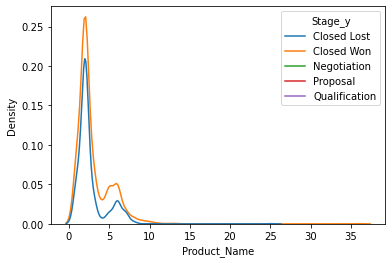

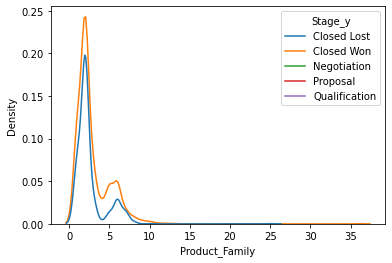

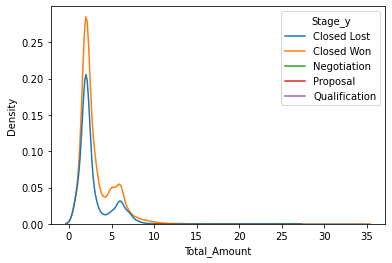

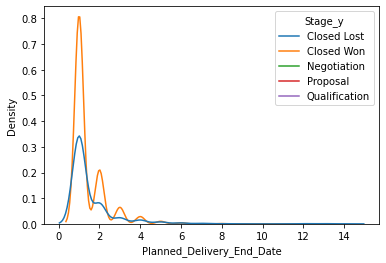

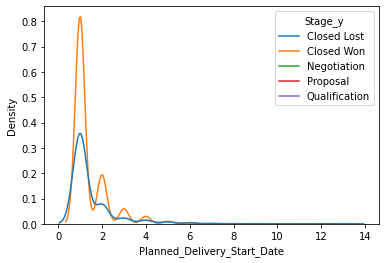

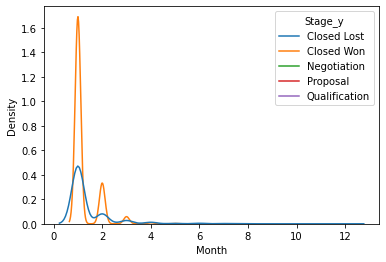

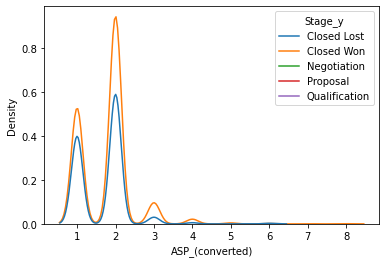

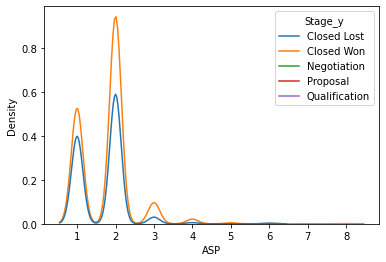

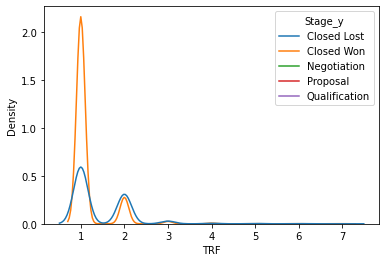

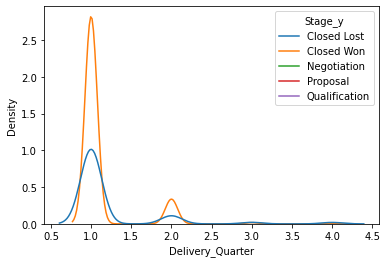

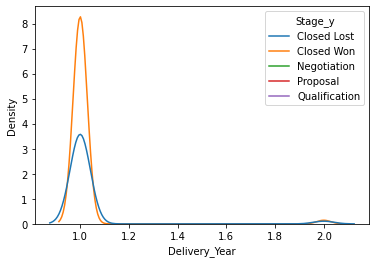

In [54]:
for columna in columnValuesByOp.index:
    #sns.kdeplot(data=to_plot,x= columna ,hue="Stage_y")
    #sns.displot(to_plot, x=columna, kde=True ,hue="Stage_y",legend = ["Closed Lost","Closed Won"])
    sns.kdeplot(data=to_plot, x=columna,hue="Stage_y")

    plt.show()

In [101]:
df["Territory"].value_counts()

Germany            1682
NW America         1568
Australia          1208
India               809
NE America          760
                   ... 
Egypt                 1
Georgia               1
Solomon Islands       1
Slovenia              1
Czech Republic        1
Name: Territory, Length: 75, dtype: int64

In [103]:
df["Region"].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [104]:
df["Billing_Country"].value_counts()

Japan            4879
United States    3802
Germany          1979
Australia        1169
India             672
                 ... 
Libya               1
Kenya               1
Chile               1
Colombia            1
Peru                1
Name: Billing_Country, Length: 79, dtype: int64